**Dataset: iris computer vision**

ref: https://www.kaggle.com/datasets/jeffheaton/iris-computer-vision

Most data scientists are familiar with Fisher's Iris Dataset. The original Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
The dataset presented here provides images for the space species of iris that were chosen by Fisher. Can you classify iris images with computer vision?


In [3]:
# authentication
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:


img_dir = "/content/drive/My Drive/iris-classification/"
img_subdirs =['iris-setosa/', 'iris-versicolour/', 'iris-virginica/']


df = pd.DataFrame()

for img_subdir in img_subdirs:
   for img_path in sorted(os.listdir(img_dir+img_subdir)):
      row = {'label':img_subdir, 'img_path':img_dir+img_subdir+img_path}
      df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     421 non-null    object
 1   img_path  421 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


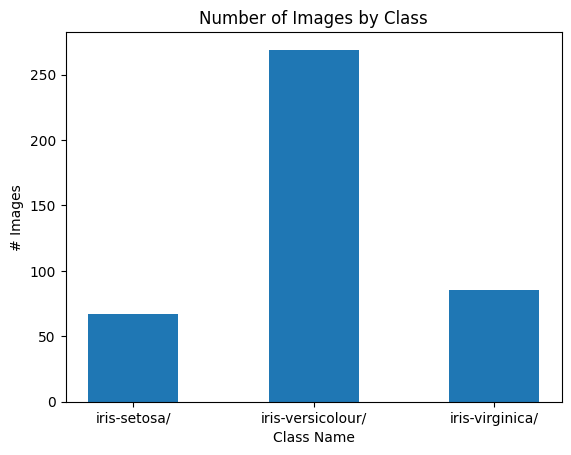

In [3]:
number_classes = {
'iris-setosa/': len(os.listdir(img_dir+'iris-setosa/')),
'iris-versicolour/': len(os.listdir(img_dir+'iris-versicolour/')),
'iris-virginica/': len(os.listdir(img_dir+'iris-virginica/'))
}

plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

We can see that iris-versicolour is the majoritr class, it cause **class imbalanced** problem.

So, we need to balance all classes by following steps.

In [46]:
g = df.groupby('label')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_paths = g
df_paths.info()
#df_paths = df
#df_paths.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 201 entries, ('iris-setosa/', 0) to ('iris-virginica/', 66)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     201 non-null    object
 1   img_path  201 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


Convert each image array to vectors

**Width**x**Height**x**3**      to     **pixels**x**3**

In [47]:
y=[]
X=[]
images=[]

for index, row in df_paths.iterrows():
  img = cv2.imread(row['img_path'])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224,224))

  images.append(img)
  # flatten image
  x = img.reshape((-1,3))

  X.append(x)
  y.append(row['label'])

X = np.array(X)


images = np.array(images)
print(X.shape)
print(images.shape)

(201, 50176, 3)
(201, 224, 224, 3)


**Sample Images Plot**

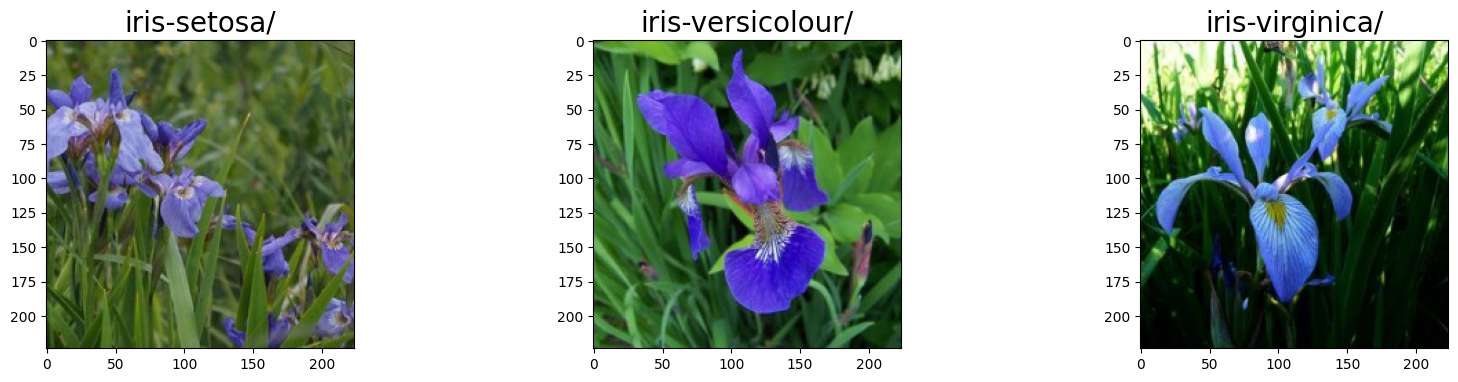

In [6]:
images_show=[images[0],images[70],images[140]]
labels_show=[y[0],y[70],y[140]]
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(images_show, labels_show)):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image)
  plt.title( label, fontsize = 20)

Image segmentation using KMeans

In [106]:

for i in range(len(images)):

  float_img = np.float32(X[i])

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

  K = 2
  attempts=10
  ret,label,center=cv2.kmeans(float_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  #print(center)

  if center[0][2] > [100]:
    center = [[0,  0,  0 ],[ 255, 255, 255]]
  else:
    center = [[ 255, 255, 255],[0,  0,  0 ]]

  center = np.uint8(center)
  res = center[label.flatten()]

  print(res.shape)
  result_image = res.reshape((images[i].shape))

  out = cv2.addWeighted(images[i], 1.0, result_image, 1.0,0)

  figure_size = 15
  # plt.figure(figsize=(figure_size,figure_size))
  # plt.subplot(1,2,1),plt.imshow(images[i])
  # plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  # plt.subplot(1,2,2),plt.imshow(out)
  # plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
  # plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 1

In [33]:
!pip install -qq rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.5 MB/s eta 0:00:00


In [107]:
from rembg import remove

imagesp=[]

for i in range(len(images)):

  out = remove(images[i])
  imagesp.append(out)

  # figure_size = 15
  # plt.figure(figsize=(figure_size,figure_size))
  # plt.subplot(1,2,1),plt.imshow(images[i])
  # plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  # plt.subplot(1,2,2),plt.imshow(out)
  # plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
  # plt.show()

ModuleNotFoundError: No module named 'rembg'

Convert to

(201, 224, 224, 4)
(201, 224, 224, 3)


(<Axes: >, <matplotlib.image.AxesImage at 0x7f9fc14fa680>)

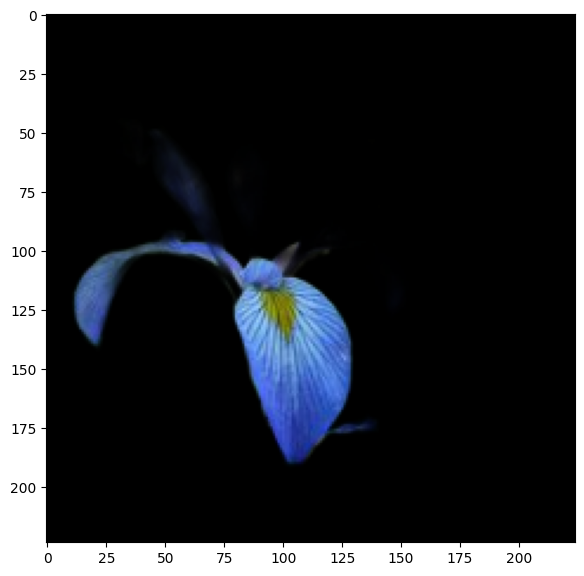

In [59]:
imagesp = np.array(imagesp)
print(imagesp.shape)
imagespp = imagesp[:,:,:,:3]
print(imagespp.shape)

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(imagespp[140])

In [60]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from keras import backend as K
K.clear_session()
# Call resnet50 model
base_model = ResNet50(weights='imagenet', include_top=True)
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Take convolutional layers form **resnet50** model

then pass the images to the Layers.

In [62]:
import pandas as pd
from keras.models import Model

# call layer inside resnet50 model
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# pass image to convolutional layers
images_pred =[]
for image in imagespp:
  image = np.expand_dims(image, axis=0)
  predict_model = model.predict(image)
  images_pred += [predict_model[0]]
print (np.shape(images_pred))
df_feature = pd.DataFrame(images_pred )
df_feature.to_csv('/content/drive/My Drive/iris-classification/feature_res50_segmented.csv')
df_feature

1/1 [==============================] - 0s 318ms/step
(201, 2048)


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.687755,0.061833,0.110446,0.005434,0.068262,0.000000,0.000000,0.538728,0.013924,0.011491,...,0.000000,0.000000,0.017887,0.461039,0.000000,0.014461,0.052762,1.036058,0.435102,0.024709
1,4.211746,0.000000,0.003798,0.064061,0.033340,0.000000,0.000000,0.094367,0.019018,0.000000,...,0.301467,0.000000,0.082799,0.157790,0.201358,0.130826,0.252587,2.588848,0.173510,0.763406
2,1.077872,0.000000,0.032723,0.085894,0.005473,0.247448,0.021187,0.000000,0.071452,0.000000,...,0.460840,0.000000,0.012771,0.527549,0.000000,0.417210,0.000000,3.251549,1.238745,0.077489
3,3.389451,0.003954,0.000000,0.000000,0.408552,0.015090,0.238969,0.000000,0.018788,0.000000,...,0.285439,0.000000,0.000000,0.384137,0.097921,0.068712,0.216143,1.698067,0.603191,0.185760
4,4.679071,0.222702,0.000000,0.010110,0.344693,0.000000,0.537916,0.266211,0.464975,0.006435,...,0.678758,0.184112,0.000000,0.941968,0.020813,0.000000,0.242729,1.498045,0.175636,0.407341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,5.073580,0.000000,0.011295,0.000000,0.002469,0.004964,0.009316,0.000000,0.011390,0.014001,...,0.033191,0.311621,0.085143,0.157044,0.000000,0.000000,0.000000,2.088625,0.493789,1.284408
197,4.170986,0.009193,0.102662,0.018032,0.279953,0.000000,0.000000,0.014852,0.001592,0.000000,...,0.172964,0.000000,0.000000,0.093375,0.015397,0.107793,0.085415,0.985410,0.389708,0.169360
198,0.512145,0.149438,1.090938,0.062954,0.032569,0.000000,0.000000,0.098242,0.000000,0.000000,...,0.007085,0.000000,0.000000,0.045684,0.000000,0.000000,0.063591,1.982479,0.124028,0.232208
199,3.427914,0.355217,0.008291,0.000000,0.354917,0.000000,0.101652,0.591346,0.264620,0.000000,...,0.240982,0.000000,0.273391,0.986398,0.000000,0.000000,0.631377,1.406484,0.251588,0.950292


In [15]:
df_feature= pd.read_csv('/content/drive/My Drive/iris-classification/feature_res50_segmented.csv')
#df_feature
df_feature = df_feature.drop("Unnamed: 0",axis=1)
df_feature

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.687755,0.061833,0.110446,0.005434,0.068262,0.000000,0.000000,0.538728,0.013924,0.011491,...,0.000000,0.000000,0.017887,0.461039,0.000000,0.014461,0.052762,1.036058,0.435102,0.024709
1,4.211746,0.000000,0.003798,0.064061,0.033340,0.000000,0.000000,0.094367,0.019018,0.000000,...,0.301467,0.000000,0.082799,0.157790,0.201358,0.130826,0.252587,2.588848,0.173510,0.763406
2,1.077872,0.000000,0.032723,0.085894,0.005473,0.247448,0.021187,0.000000,0.071452,0.000000,...,0.460840,0.000000,0.012771,0.527549,0.000000,0.417210,0.000000,3.251549,1.238745,0.077489
3,3.389451,0.003954,0.000000,0.000000,0.408552,0.015090,0.238969,0.000000,0.018788,0.000000,...,0.285439,0.000000,0.000000,0.384137,0.097921,0.068712,0.216143,1.698067,0.603191,0.185760
4,4.679071,0.222702,0.000000,0.010110,0.344693,0.000000,0.537916,0.266211,0.464975,0.006435,...,0.678758,0.184112,0.000000,0.941968,0.020813,0.000000,0.242729,1.498045,0.175636,0.407341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,5.073580,0.000000,0.011295,0.000000,0.002469,0.004964,0.009316,0.000000,0.011390,0.014001,...,0.033191,0.311621,0.085143,0.157044,0.000000,0.000000,0.000000,2.088625,0.493789,1.284408
197,4.170986,0.009193,0.102662,0.018032,0.279953,0.000000,0.000000,0.014852,0.001592,0.000000,...,0.172964,0.000000,0.000000,0.093375,0.015397,0.107793,0.085415,0.985410,0.389708,0.169360
198,0.512145,0.149438,1.090938,0.062954,0.032569,0.000000,0.000000,0.098242,0.000000,0.000000,...,0.007085,0.000000,0.000000,0.045684,0.000000,0.000000,0.063591,1.982479,0.124028,0.232208
199,3.427914,0.355217,0.008291,0.000000,0.354917,0.000000,0.101652,0.591346,0.264620,0.000000,...,0.240982,0.000000,0.273391,0.986398,0.000000,0.000000,0.631377,1.406484,0.251588,0.950292


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_feature = scaler.fit_transform(df_feature)

In [105]:
# X is Feature of from Resnet50 model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y_num=np.array([0]*201)
y_num[:67] =0
y_num[67:134] =1
y_num[134:] =2


X = np.array(df_feature)
print(X.shape,y_num.shape)

X02 = np.concatenate((X[:67,:], X[134:,:]))
y02 = np.concatenate((y_num[:67], y_num[134:]))
print(X02.shape,y02.shape)
x_train, x_test, y_train, y_test = train_test_split(X02,y02, test_size=0.3)

svmsvc = svm.SVC(C=10, probability=True)
svmsvc.fit(x_train,y_train)

pred = svmsvc.predict(x_test)
print(confusion_matrix(y_test, pred))
score = svmsvc.score(x_test, y_test)
print(score)


(201, 2048) (201,)
(134, 2048) (134,)
[[16  3]
 [ 3 19]]
0.8536585365853658


explained variance ratio (first two components): [0.0827096  0.07324906]


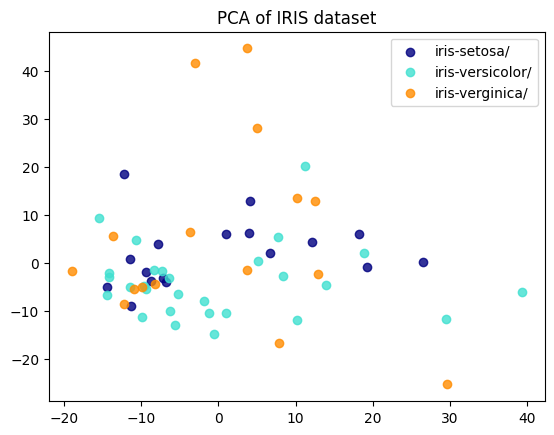

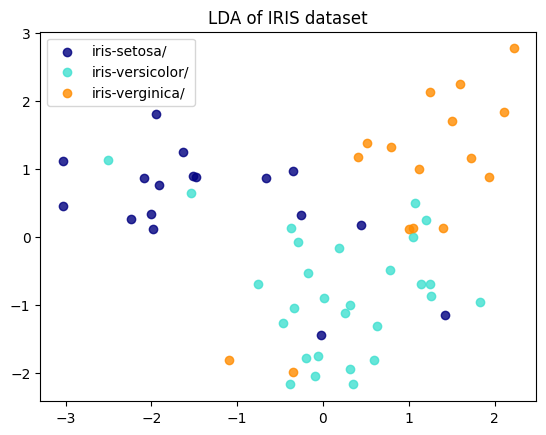

In [22]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



target_names = ['iris-setosa/','iris-versicolor/','iris-verginica/']


pca = PCA(n_components=2)
X_r = pca.fit(x_test).transform(x_test)
#print(X_r)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(x_test, y_test).transform(x_test)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)


plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw =2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
      X_r[y_test == i, 0], X_r[y_test == i, 1], color=color, alpha=0.8, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
   plt.scatter(
      X_r2[y_test == i, 0], X_r2[y_test == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [55]:

from sklearn.metrics import accuracy_score, confusion_matrix


In [79]:
from sklearn.cluster import AgglomerativeClustering, KMeans


pca = PCA(n_components=3)
X_r = pca.fit(X02).transform(X02)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_r)

print(kmeans.labels_)
label_map = {0:2, 1:0}
y_pred_mapped = [label_map[e] for e in kmeans.labels_]


print(y02)

print( confusion_matrix(y02,y_pred_mapped) )
print(accuracy_score(y02, y_pred_mapped))






# pca = PCA(n_components=2)
# X_r = pca.fit(X).transform(X)

# plt.figure()
# colors = ["navy", "turquoise", "darkorange"]
# lw =2

# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(
#       X_r[kmeans.labels_ == i, 0], X_r[kmeans.labels_ == i, 1], color=color, alpha=0.8, label=target_name
#     )
# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.title("PCA of IRIS dataset")


[1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[24 43]
 [23 44]]
0.5074626865671642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 2, 0])